### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
print(reviews.shape)
print(reviews.dtypes)
reviews.head()

(2000, 11)
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


- There are 2000 rows and 11 columns of data

In [3]:
# Review metadata and descriptive statistics.
print(reviews.info())
reviews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


#### Interpretation:

#### Age Distribution:

- The average age of individuals is around 39.5 years, with a standard deviation of approximately 13.57 years.
- The age distribution ranges from 17 to 72 years.
- The median age is 38 years, indicating that half of the individuals are younger than 38 years and half are older.

#### Remuneration:

- The average remuneration is approximately £48.08k, with a standard deviation of approximately £23.12k.
- The remuneration varies from £12.30k to £112.34k.
- The median remuneration is £47.15k, suggesting that half of the individuals earn less than £47.15k and half earn more.

#### Spending Score:

- The spending score has an average of 50, with a standard deviation of approximately 26.09.
- The spending score ranges from 1 to 99.
- The median spending score is also 50, indicating that half of the individuals have a spending score below 50 and half have a score above.

#### Loyalty Points:

- The average loyalty points are approximately 1578.03, with a standard deviation of approximately 1283.24.
- The loyalty points vary from 25 to 6847.
- The median loyalty points are 1276, suggesting that half of the individuals have fewer loyalty points and half have more.

#### Product Value:

- The average product value is approximately 4320.52, with a standard deviation of approximately 3148.94.
- The product value ranges from 107 to 11086.
- The median product value is 3624, indicating that half of the individuals have a product value below 3624 and half have a value above.


These interpretations provide insights into the distribution, central tendency, and variability of each variable in this dataset. 

In [4]:
# Any missing values?
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

- There are no missing values per column.

## 2. Drop columns

In [5]:
# Drop unnecessary columns.
columns_to_drop = ['language', 'platform']
reviews.drop(columns=columns_to_drop, inplace=True)

# View column names.
print(reviews.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


## 3. Rename columns

In [6]:
# Rename the column headers.
new_column_names = {'remuneration (k£)' : 'remuneration',
                   'spending_score (1-100)' : 'spending'}

# Rename the columns and verify column names.
reviews.rename(columns=new_column_names, inplace=True)

# View column names.
print(reviews.columns)

Index(['gender', 'age', 'remuneration', 'spending', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


## 4. Save the DataFrame as a CSV file

In [7]:
# Create a CSV file as output.
reviews.to_csv('/Users/Chloe/Documents/LSE DATA ANALYTICS CAREER ACCELERATOR - COURSE 3 PYTHON & R /LSE_DA301_assignment_files/turtle_reviews_clean.csv', index=False)

In [8]:
# Import new CSV file with Pandas.
reviews_new = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
print(reviews_new.shape)
print(reviews_new.info())
print(reviews_new.dtypes)
reviews_new.head()

(2000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending        2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None
gender             object
age                 int64
remuneration      float64
spending            int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object


,gender,age,remuneration,spending,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [9]:
# Descriptive statistics.
reviews_new.describe()

,age,remuneration,spending,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


#### Additional questions:
- What is the distribution of male and female customers?
- What is the distribution of education types?
- How do remuneration, spending behavior, and loyalty points accumulation vary across gender?
- How do remuneration, spending behavior, and loyalty points accumulation vary across different education levels?

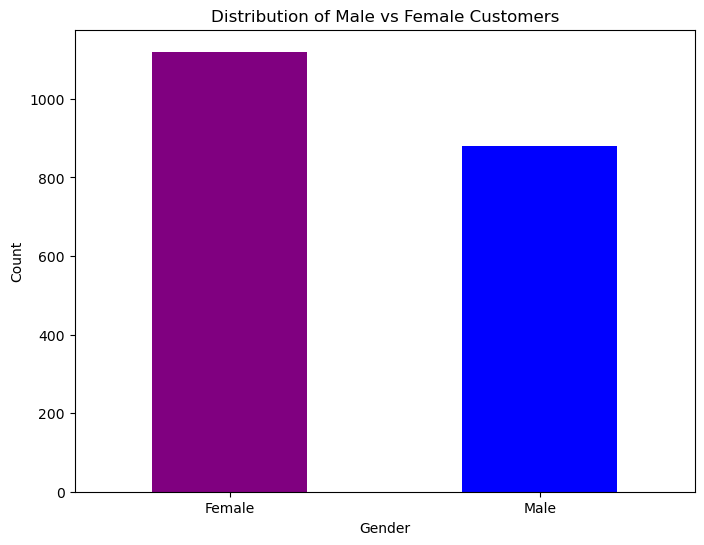

In [10]:
# What is the distribution of male and female customers?
# Plotting the distribution of male vs female customers
plt.figure(figsize=(8, 6))
reviews_new['gender'].value_counts().plot(kind='bar', color=['purple', 'blue'])
plt.title('Distribution of Male vs Female Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

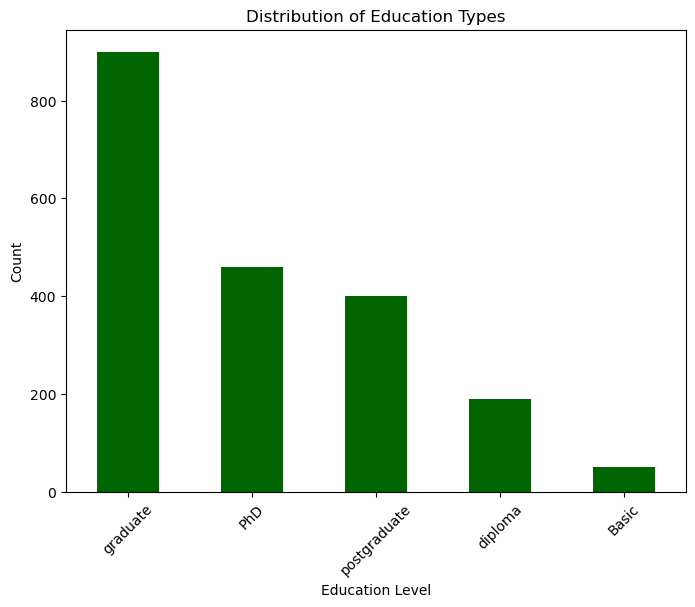

In [11]:
# What is the distributio of education types?
# Plotting the distribution of education types.
plt.figure(figsize=(8, 6))
reviews_new['education'].value_counts().plot(kind='bar', color='darkgreen')
plt.title('Distribution of Education Types')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary for better readability
plt.show()

In [12]:
# How do remuneration, spending behavior, and loyalty points accumulation vary across gender?
# Group by 'gender' and calculate the mean of 'remuneration', 'loyalty_points', and 'spending'.
grouped_data = reviews_new.groupby('gender').agg({'remuneration': 'mean', 'spending': 'mean', 'loyalty_points': 'mean',}).reset_index()

# View the output
grouped_data

,gender,remuneration,spending,loyalty_points
0,Female,47.291304,50.691071,1601.166964
1,Male,49.081659,49.120455,1548.587500


##### Interpretation:
    
- On average, males have a slightly higher remuneration of approximately £49,0800 compared to females, who have an average remuneration of about £47,290.
- Females (50.69) also exhibit higher on average spending scores comapred to males (49.12)
-  Females have a higher value of loyalty points at approximately 1601.17 compared to males, who have an average of approximately 1548.59 loyalty points. Despite lower remuneration, females tend to spend more. 
- Females accumulate more loyalty points, with an average of 1601 points, compared to males who accumulate approximately 1549 points on average. Increased loyalty points indicate increased spending, which makes sense in this instance as females on average spend more even though their average salary is less than their male counterparts. 

In [13]:
# How do remuneration, spending behavior, and loyalty points accumulation vary across different education levels?
# Group by 'education' and calculate mean (average) salary and loyalty points.
grouped_data2 = reviews_new.groupby('education').agg({'remuneration': 'mean','spending': 'mean', 'loyalty_points': 'mean'}).reset_index()

# View the ouput.
grouped_data2

,education,remuneration,spending,loyalty_points
0,Basic,59.581200,53.260000,2265.040000
1,PhD,51.225043,46.626087,1499.750000
2,diploma,43.585158,40.989474,1336.021053
3,graduate,47.302156,53.122222,1666.057778
4,postgraduate,46.906050,50.727500,1499.077500


##### Interpretation: 
- Individuals with a basic education exhibit the highest average remuneration of approximately £59,581, suggesting higher financial earnings compared to other education categories.
- Individuals with a basic education also demonstrate a relatively high spending behavior score of around 53.26, indicating a propensity for increased spending behavior on a scale from 1 to 100, and have the highest average loyalty points accumulation.
- Individuals with a diploma show the lowest average remuneration, spending behavior score, and loyalty points accumulation among the education categories. 
- Graduates and postgraduates display similar patterns in remuneration, spending behavior, and loyalty points accumulation. 

## 5. Linear regression

### 5a) spending vs loyalty

In [14]:
# Independent variable.
x = reviews_new['spending']

# Dependent variable.
y = reviews_new['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews_new).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):          2.92e-263
Time:                        18:34:59   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Interpretation:

##### R-squared: 
- The R-squared value of 0.452 indicates that approximately 45% of the observed variation in loyalty points can be explained by changes in spending behavior. This suggests a moderately strong relationship between spending and loyalty points, indicating that spending behavior is a significant factor in determining loyalty points.

##### Adjusted R-squared: 
- The adjusted R-squared value of 0.452 reaffirms the model's explanatory power, accounting for nearly 45% of the total variability in loyalty points.

##### F-statistic: 
- The high F-statistic of 1648 indicates a highly significant model fit. 

##### Prob (F-statistic): 
- The p-value is 2.92e-263, significantly less than 0.05, confirming statistical significance.

##### x values (Coefficients):
-The coefficient for spending indicates that for every one-unit increase in spending, there is a corresponding 33.0617-unit increase in loyalty points. This suggests a significant and positive impact of spending behavior on loyalty points accumulation.
- The probability of the t-value is zero, indicating a highly significant slope, further confirming the strong relationship between spending and loyalty points.
- The 95% confidence interval for the coefficient (31.464, 34.659) indicates the range within which we can be confident that the true coefficient (slope) lies. This interval provides insight into the expected variability in the slope across different samples, suggesting that the effect of spending on loyalty points is likely to fall within this range with a high level of confidence.

In [15]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse) 

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [16]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.0527) + 33.0617 * reviews_new['spending']

# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending, Length: 2000, dtype: float64

##### Interpretation:

- The predicted values in y_pred provide estimates of the loyalty points a customer is expected to accumulate based on their spending behaviour, as predicted by the linear regression model.
- We can view predicted dependent values (loyalty points) e.g. 1214.3536, for each independent value (spending).

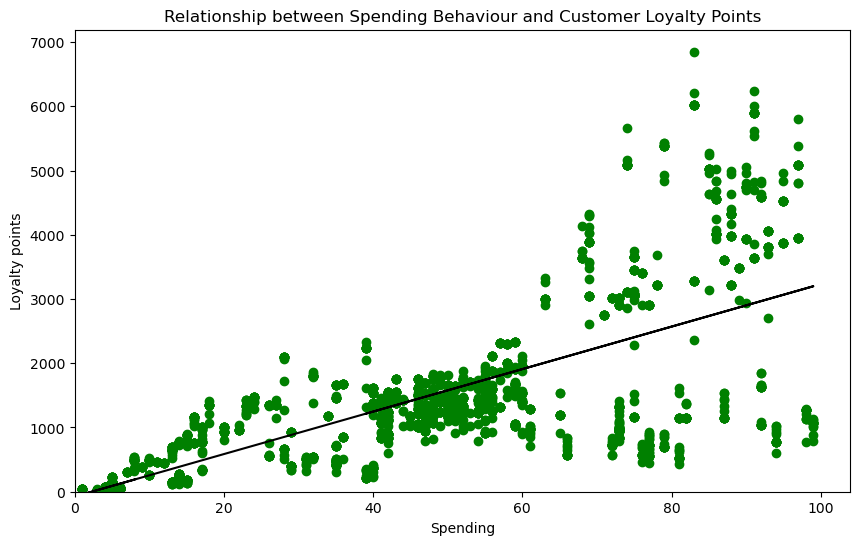

In [17]:
# Plot the graph with a regression line.
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color = 'green')

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Axis labels and Title.
plt.title("Relationship between Spending Behaviour and Customer Loyalty Points")
plt.xlabel("Spending")
plt.ylabel("Loyalty points")

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

In [18]:
# Independent variable.
x = reviews_new['remuneration']

# Dependent variable.
y = reviews_new['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews_new).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):          2.43e-209
Time:                        18:34:59   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Interpretation:

##### R-squared:
-  The R-squared value of 0.380 indicates that approximately 38% of the observed variation in loyalty points can be explained by changes in remuneration, suggesting a moderately strong relationship between remuneration and loyalty points.

##### Adjusted R-squared: 
- The adjusted R-squared value of 0.379 reinforces the high explanatory power of the model, with nearly 38% of the total variability in loyalty points being accounted for by remuneration.

 ##### F-statistic: 
- The F-statistic is 1222, indicating moderatly high significance.

##### Prob (F-statistic): 
- Here, the p-value is 2.43e-209, significantly less than 0.05, confirming statistical significance.

##### x values (Coefficients):
- The coefficient for remuneration is 34.1878, indicating that for every one-unit increase in remuneration, there is an estimated increase of approximately 34.1878 units in loyalty points.
- The probability of the t-value is zero, indicating a significant slope.
- The 95% confidence interval for the coefficient (32.270, 36.106) indicates the expected variability in the slope across different samples, suggesting a relatively narrow range within which the true effect of remuneration on loyalty points is likely to lie.

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse) 

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [20]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.6865) + 34.1878 * reviews_new['remuneration']

# View the output.
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

##### Interpretation:

- The predicted values in y_pred provide estimates of the loyalty points a customer is expected to accumulate based on their remuneration, as predicted by the linear regression model.
- Here we see the predicted dependent values (loyalty points) e.g. 354.823440, for each independent value (remuneration).

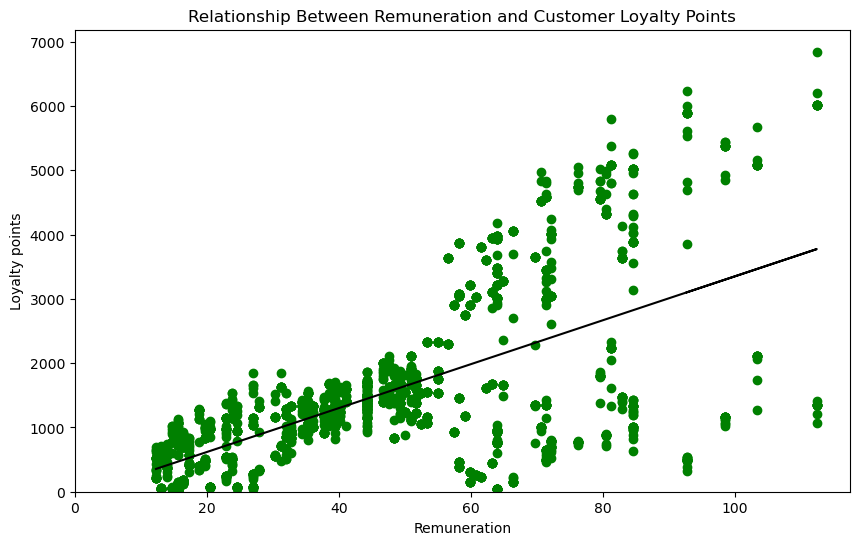

In [21]:
# Plot the graph with a regression line.
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color = 'green')

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Axis labels and Title.
plt.title("Relationship Between Remuneration and Customer Loyalty Points")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty points")

# View the plot.
plt.show()

Based on the regression table results and the above visualisation, remuneration appears to be a significant predictor of loyalty points, with the model demonstrating a strong overall fit and high explanatory power in explaining variations in loyalty points based on remuneration.

### 5c) age vs loyalty

In [22]:
# Independent variable.
x = reviews_new['age']

# Dependent variable.
y = reviews_new['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews_new).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 03 Mar 2024   Prob (F-statistic):             0.0577
Time:                        18:34:59   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Interpretation:

##### R-squared:
-  R-squared is 0.002, implying that around 0.2% of the observed variation in loyalty points can be explained by changes in age, suggesting that age alone has minimal explanatory power in predicting loyalty points.

##### Adjusted R-squared: 
- The adjusted R-squared value of 0.001 reinforces the limited explanatory ability of the model, with less than 1% of the total variability in loyalty points being accounted for by age.

 ##### F-statistic: 
- The F-statistic of 3.606 suggests moderate evidence against the null hypothesis that the coefficients of the independent variable(s) are all equal to zero, indicating that the model might have some explanatory power, albeit weak.

##### Prob (F-statistic): 
- Here, the p-value is 0.0577, which is more than 0.05, confirming statistical insignificance.

##### x values (Coefficients):
- The coefficient for age is -4.0128, indicating that for every one-unit increase in age, there is an estimated decrease of approximately 4.0128 units in loyalty points.
- The probability of the t-value is 0.058, indicating an insignificant slope.
- suggests that the true effect of age on loyalty points could fall anywhere within this range across different samples. This variability underscores the uncertainty surrounding the estimated impact of age on loyalty point.

In [23]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse) 

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [24]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (1736.5177) + -4.01280 * reviews_new['age']

# View the output.
y_pred

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

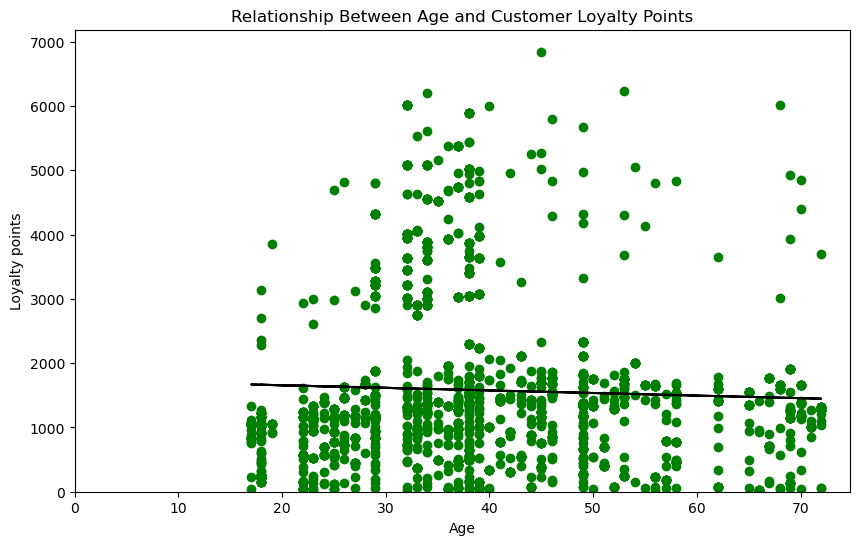

In [25]:
# Plot the graph with a regression line.
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color = 'green')

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Axis labels and Title.
plt.title("Relationship Between Age and Customer Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty points")

# View the plot.
plt.show()

## 6. Observations and insights

##### Spending Behavior and Remuneration (income) Impact on Loyalty Points:

The analysis indicates that both spending behavior and remuneration significantly explain variations in loyalty points. Specifically, as spending behavior increases or remuneration rises, the model predicts a corresponding increase in loyalty points. This suggests that spending behavior and remuneration are effective predictors of loyalty points accumulation.

##### Age's Influence on Loyalty Points:

Unlike spending behavior and remuneration, age does not significantly predict variations in loyalty points. In fact, the model reveals an inverse relationship between age and loyalty points, where younger customers tend to have higher loyalty points compared to older customers. This finding suggests that age alone is not a reliable predictor of loyalty points, and further investigation is warranted.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [26]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [27]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df2

,gender,age,remuneration,spending,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [28]:
# Drop unnecessary columns.
df2 = df2.drop(columns=['gender', 'age', 'loyalty_points', 'education', 'product', 'review', 'summary'])

# View DataFrame.
df2

,remuneration,spending
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [29]:
# Explore the data.
print(df2.shape)
print(df2.info())
print(df2.dtypes)
df2.head()

(2000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   remuneration  2000 non-null   float64
 1   spending      2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None
remuneration    float64
spending          int64
dtype: object


,remuneration,spending
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [30]:
# Descriptive statistics.
df2.describe()

,remuneration,spending
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<Axes: xlabel='remuneration', ylabel='spending'>

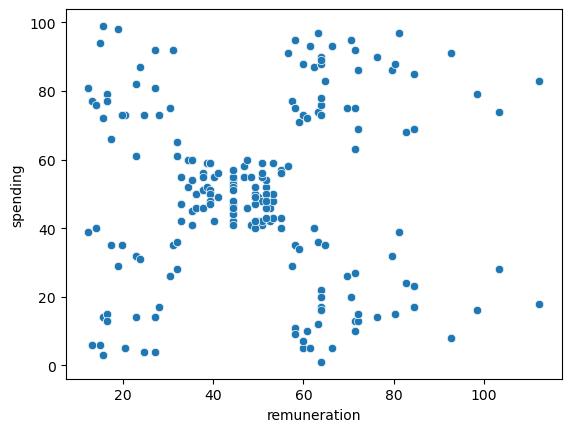

In [31]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending',
                data=df2)

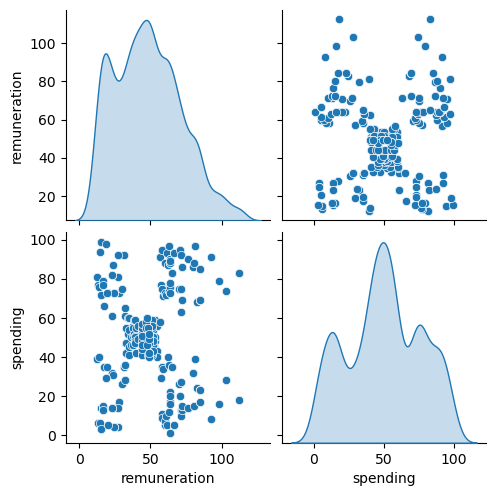

In [32]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending']]

sns.pairplot(df2,
             vars=x,
             diag_kind= 'kde')

## 3. Elbow and silhoutte methods

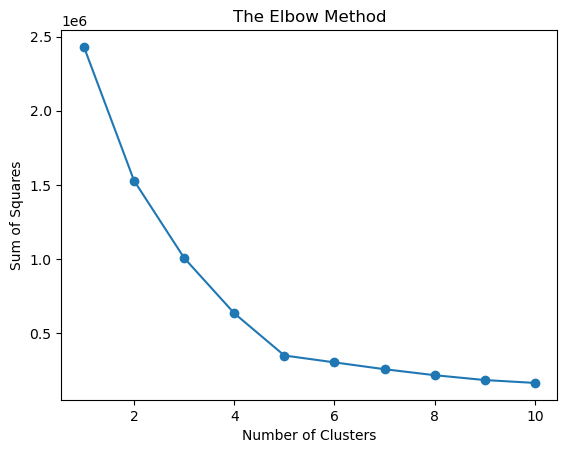

In [33]:
# Determine the number of clusters: Elbow method.
# Initialise an empty list to store the sum of squares
ss = []

# Iterate over each number of clusters from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)
    
# Plot the Elbow Method
plt.plot(range(1, 11), ss, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squares")

# Show the plot
plt.show()

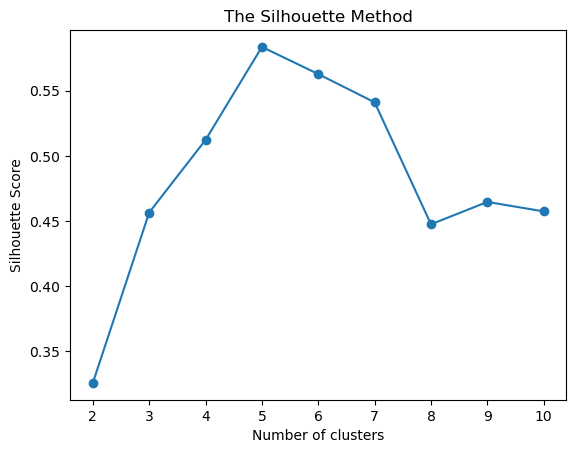

In [34]:
# Determine the number of clusters: Silhouette method.
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))
# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")

# View the plot.
plt.show()

## 4. Evaluate k-means model at different values of *k*

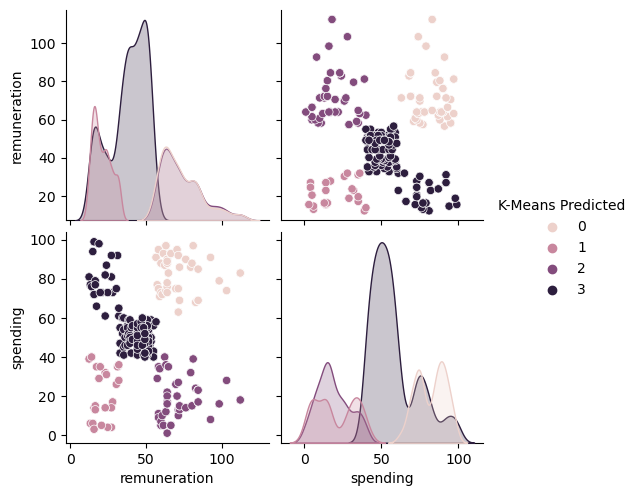

In [35]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [36]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

3    1013
0     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

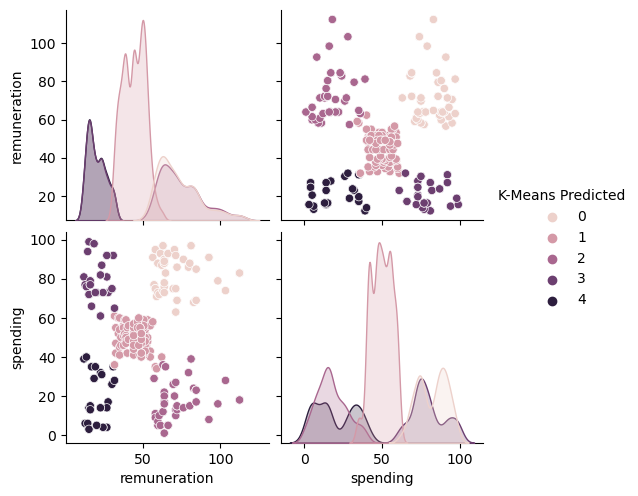

In [37]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

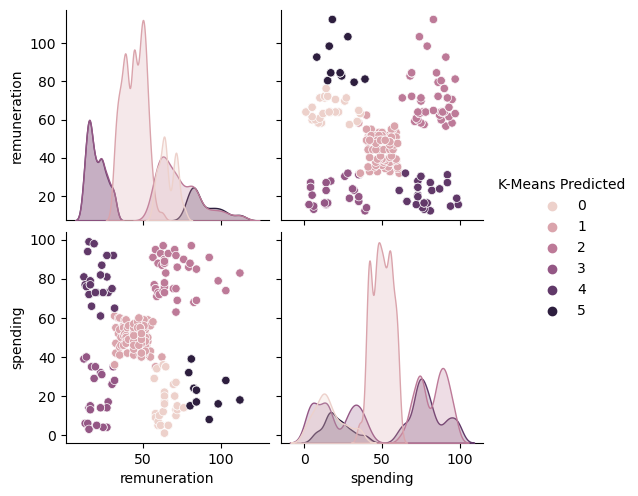

In [38]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [39]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    767
2    356
3    271
4    269
0    214
5    123
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

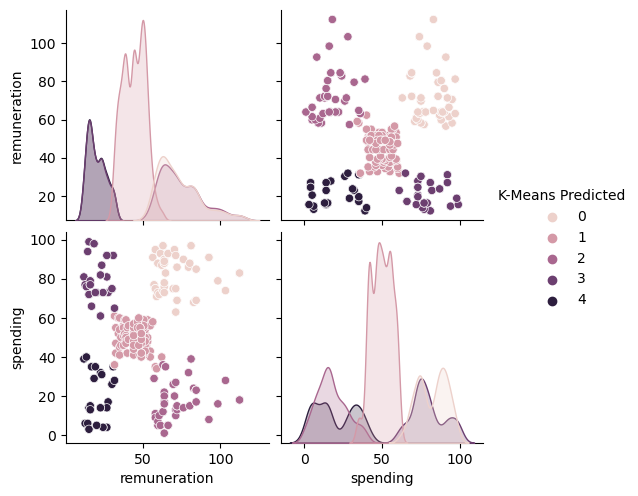

In [40]:
# Apply the final model.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [41]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

#### Justify selection:
- Selecting the number of clusters corresponding to the elbow point of the Elbow method plot and the peak of the Sihoutte score plot, K=5 is shown to be the optimal number of clusters for k-means clustering.
- Here, 3 values for k, are plotted. The corresponding pairplots indicate that k=5 is most ideal value for the best clustering.
- When viewing the number of predicted values per class, when the k values range from 4-6, k=5 shows a better distribution of data points compared to k=4 and k=6.

## 6. Plot and interpret the clusters

In [42]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending  K-Means Predicted
0         12.30        39                  4
1         12.30        81                  3
2         13.12         6                  4
3         13.12        77                  3
4         13.94        40                  4


<Axes: xlabel='remuneration', ylabel='spending'>

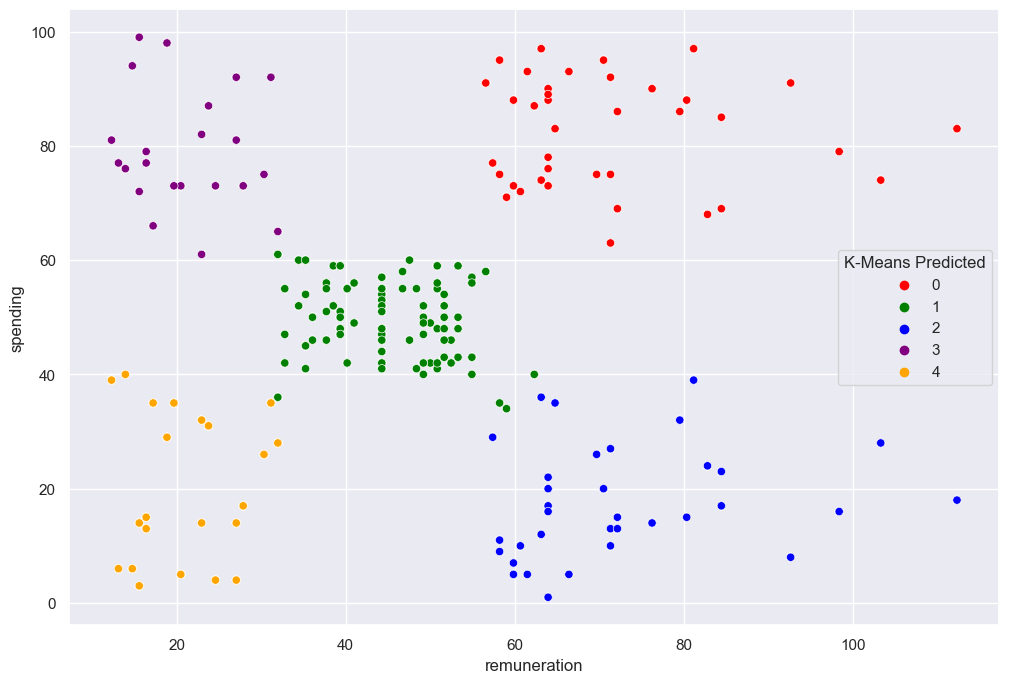

In [43]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'purple', 'orange'])

## 7. Discuss: Insights and observations

- There are 5 distinct cluster groups identified in this visualisation.
- Ranking the size of each cluster group from smallest to largest, we can see that the largest is Cluster 1, followed by 0, 2, 4 and lastely Cluster 3. 
- In the above visualisation we can see that Cluster 1 for K=5 contains the largest group of all the clusters. Here, remuneration roughly starts at 30,000 and ends just above 60,000 pounds and spending behaviour generally falls between 40 and 60. 
- Cluster 0 indicates that increased remuneration (income) is associated with increased spending behaviour, however Cluster 2  also indicates that  customers who earn the most don't always exhibit higher spending habits.

Therefore, increased income per customer does not necessarily indicate increased spending behaviour. In fact, those customers who earn roughly between £30 - 63,000 exhibit the most avergae spending behaviour, compared to the other clusters. 

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [44]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

# Import warnings.
import warnings

# Ignore warnings to suppress unnecessary output.
warnings.filterwarnings('ignore')

In [45]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df3

,gender,age,remuneration,spending,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [46]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3.drop(columns = ['gender', 'age', 'remuneration', 'spending', 'loyalty_points', 'education', 'product']).reset_index(drop=True)

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [47]:
# Determine if there are any missing values.
df3.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [48]:
# Review and Summary: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

## View output.
print(df3.head())

                                              review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap  


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [49]:
# Replace all the punctuations in review and summary column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
print(df3.head())
print(df3.shape)

                                              review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap  
(2000, 2)


In [50]:
# Calculate the number of rows in the review and summary column.
review_row_count = len(df3['review'])
summary_row_count = len(df3['summary'])

# Print the row counts.
print("Number of rows in the 'review' column:", review_row_count)
print("Number of rows in the 'summary' column:", summary_row_count)

Number of rows in the 'review' column: 2000
Number of rows in the 'summary' column: 2000


### 2c) Drop duplicates in both columns

In [51]:
# Check the number of duplicate values in the 'review' and 'summary' columns.
duplicate_count = df3.duplicated(subset=['review', 'summary']).sum()

# Drop duplicates based on both 'review' and 'summary' columns in the original DataFrame.
df3.drop_duplicates(subset=['review', 'summary'], inplace=True)

# Reset the index.
df3.reset_index(drop=True, inplace=True)

# View the ouput.
print(df3.head())
print(df3.shape)

                                              review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap  
(1961, 2)


## 3. Tokenise and create wordclouds

In [52]:
# Create new DataFrame (copy DataFrame).
df3_copy = df3.copy()

# View DataFrame.
df3_copy

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1956,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,great game did not think i would like it when ...,super fun
1958,great game for all keeps the mind nimble,great game
1959,fun game,four stars


In [53]:
# Tokenise the 'review' column.
df3_copy['review'] = df3_copy['review'].apply(word_tokenize)

# Tokenise the 'summary' column.
df3_copy['summary'] = df3_copy['summary'].apply(word_tokenize)

# View DataFrame.
print(df3_copy.head())

                                              review  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                             summary  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]  


In [54]:
# Review: Create a word cloud.
# Combine the tokenised words into single strings for each row in the 'review' column
review_comments = df3_copy['review'].apply(lambda x: ' '.join(x))

# Join all strings into a single string
review_comments = ' '.join(review_comments)

# Create a WordCloud object.
word_cloud = WordCloud(width=1600, height=900, 
                       background_color='white',
                       colormap='viridis', 
                       stopwords=None,  # You can specify your own stopwords here if needed
                       min_font_size=10).generate(review_comments)

##### NOTE: 
I encountered the following error: TypeError: sequence item 0: expected str instance, list found
- The error occurred because the elements in the 'review' column of the df3_copy are lists instead of strings, which caused the Wordclouf to fail and this likely occurred because I applied tokenisation to the 'review' column earlier. 
- To resolve this issue, I converted each list of words in the 'review' column into a single string before generating the WordCloud.

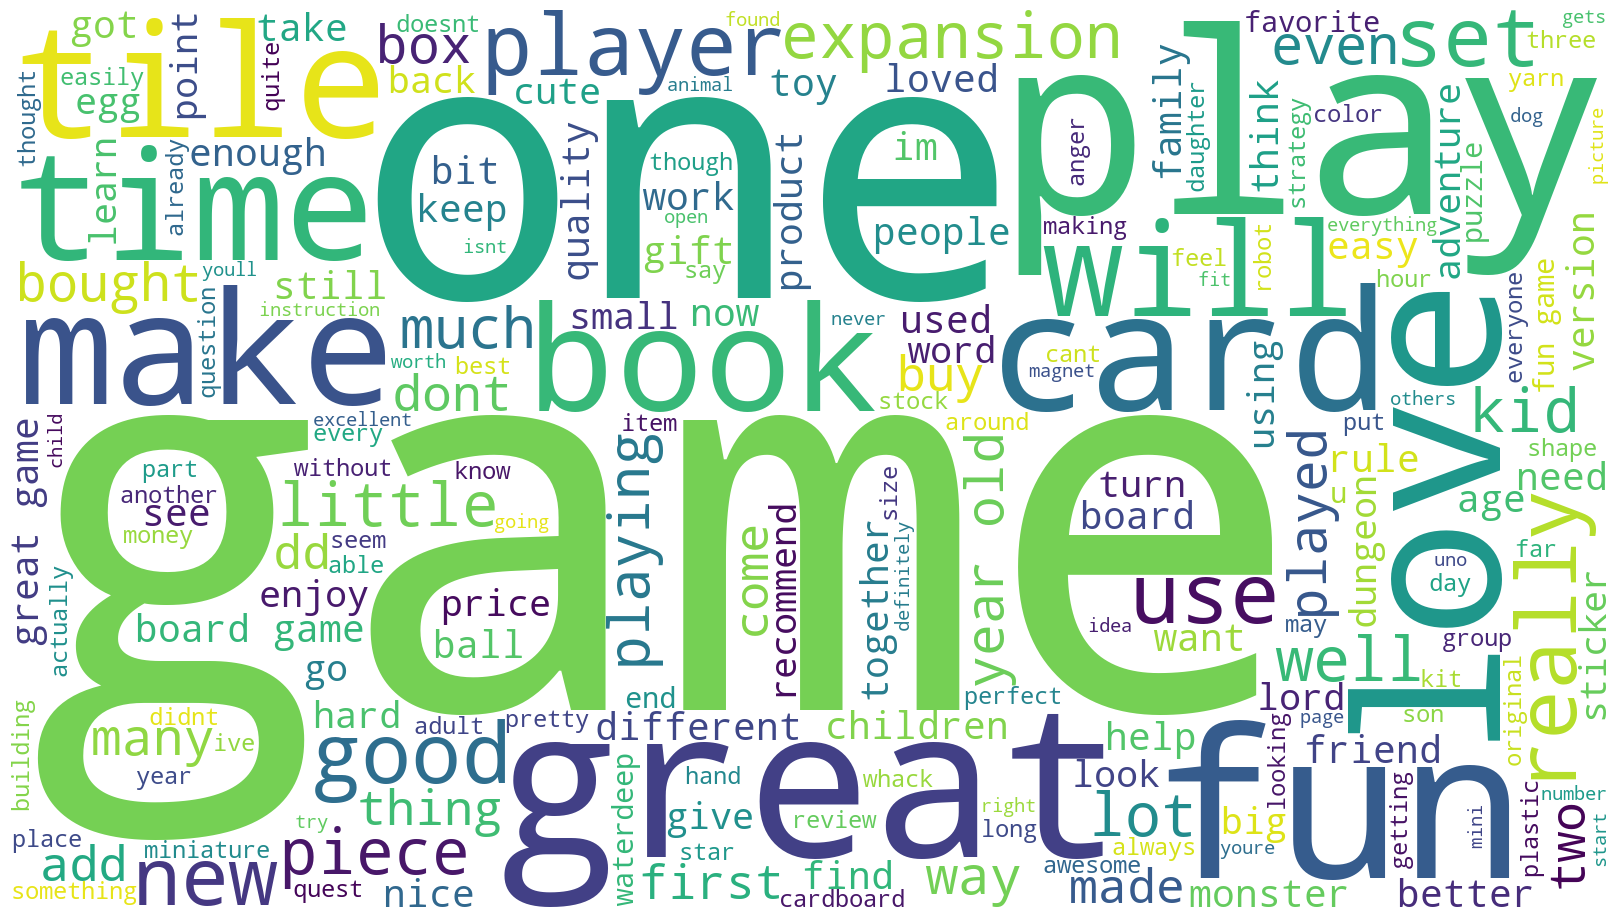

In [55]:
# Review: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [56]:
# Summary: Create a word cloud.
# Combine the tokenised words into single strings for each row in the 'review' column
summary_comments = df3_copy['summary'].apply(lambda x: ' '.join(x))

# Join all strings into a single string.
summary_comments = ' '.join(summary_comments)

# Create a WordCloud object.
word_cloud = WordCloud(width=1600, height=900, 
                       background_color='white',
                       colormap='viridis', 
                       stopwords=None,  # You can specify your own stopwords here if needed
                       min_font_size=10).generate(summary_comments)

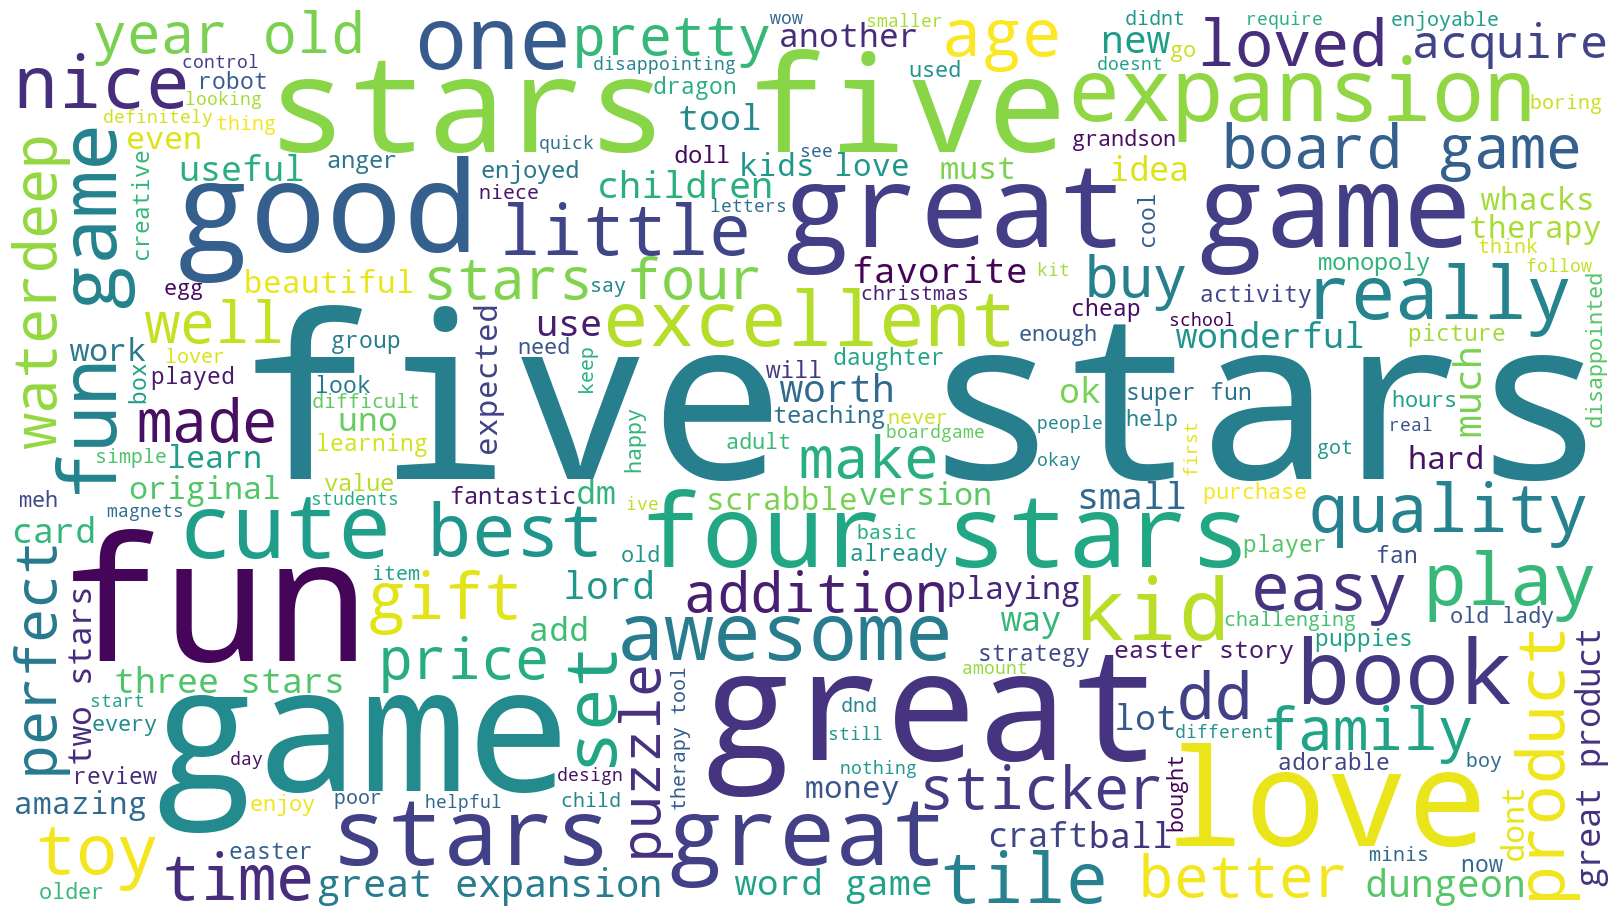

In [57]:
# Summary: Plot the WordCloud image.                  
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [58]:
# Define an empty list of tokens.
all_tokens = []

# Iterate through the 'review' and 'summary' columns of df3_copy.
for column in ['review', 'summary']:
    for tokens_list in df3_copy[column]:
        # Add each token to the list
        all_tokens.extend(tokens_list)

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5712, 'and': 3401, 'a': 3400, 'to': 3354, 'of': 2627, 'it': 2233, 'i': 2176, 'game': 1990, 'this': 1911, 'is': 1885, ...})

In [59]:
# Combine tokens from 'review' and 'summary' columns into a single list.
all_tokens = [token for column in ['review', 'summary'] for tokens_list in df3_copy[column] for token in tokens_list]

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5712, 'and': 3401, 'a': 3400, 'to': 3354, 'of': 2627, 'it': 2233, 'i': 2176, 'game': 1990, 'this': 1911, 'is': 1885, ...})

### 4b) Remove alphanumeric characters and stopwords

In [60]:
# Delete all the alpanum.
tokens = [word for word in all_tokens if word.isalnum()]

In [61]:
# Remove all the stopwords.
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

### 4c) Create wordcloud without stopwords

In [62]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='viridis', 
                min_font_size = 10).generate(tokens2_string) 

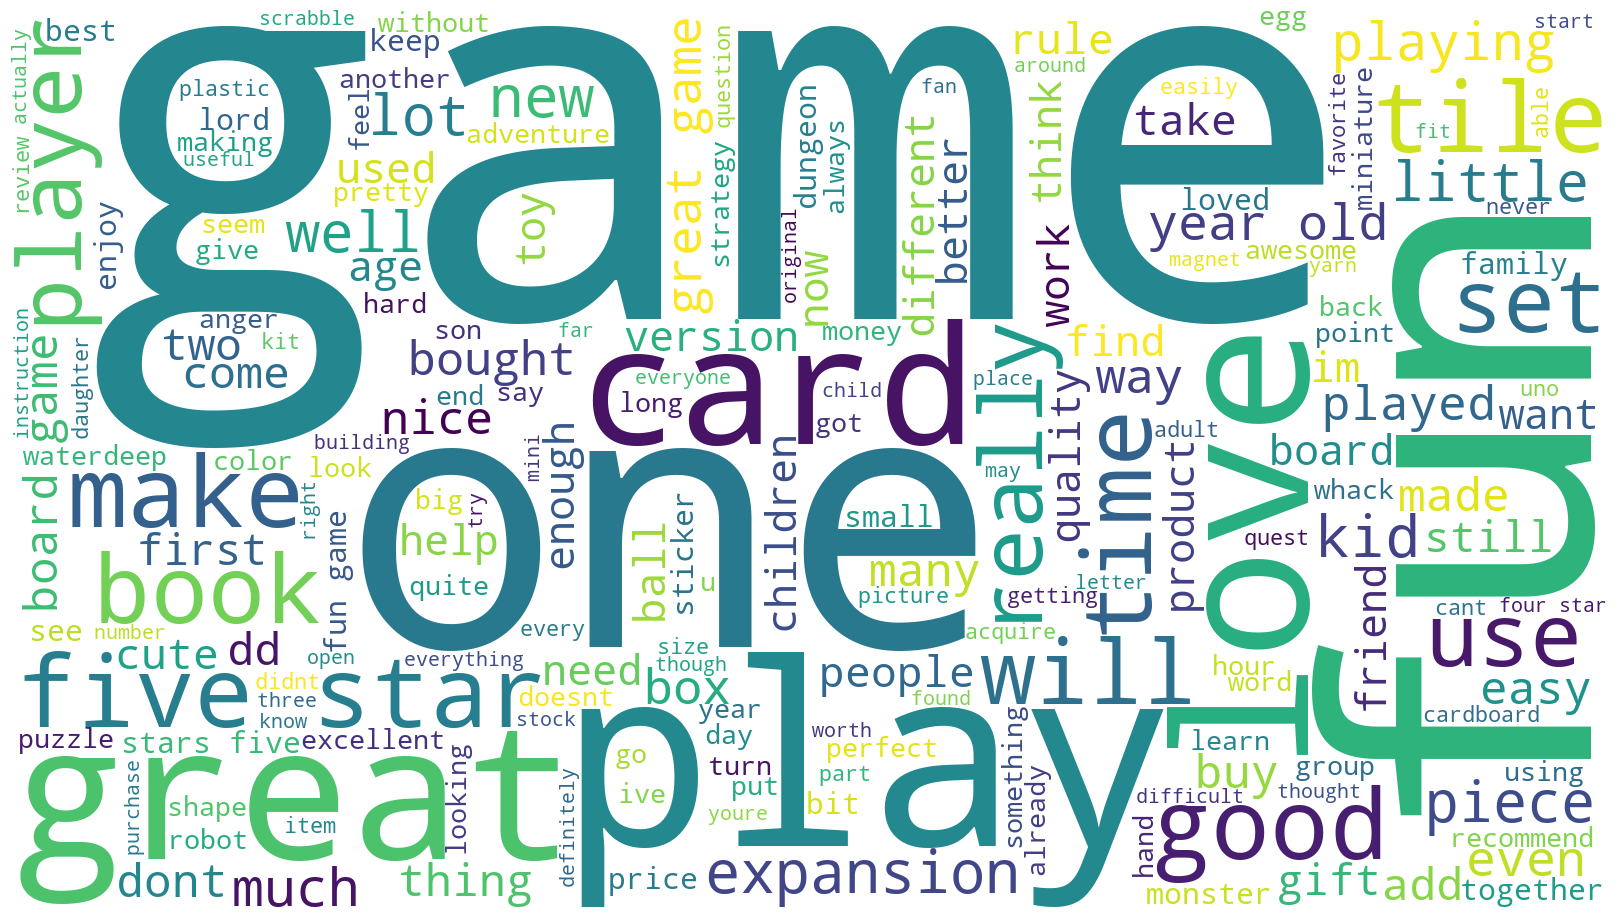

In [63]:
# Plot the wordcloud image.
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [64]:
# D# View the frequency distribution.
fdist1 = FreqDist(tokens2)

# Preview the data.
fdist1 

FreqDist({'game': 1990, 'great': 875, 'fun': 770, 'one': 568, 'play': 528, 'like': 468, 'stars': 464, 'love': 416, 'good': 381, 'five': 362, ...})

In [65]:
# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')
# Preview data.
counts

,Frequency
Word,
game,1990
great,875
fun,770
one,568
play,528
like,468
stars,464
love,416
good,381


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [66]:
# Provided function.
def generate_polarity(tokens_list):
    '''Extract polarity score (-1 to +1) for each list of tokens'''
    comment_text = ' '.join(tokens_list)  # Convert list of tokens into a single string
    return TextBlob(comment_text).sentiment[0]

In [67]:
# Determine polarity of 'review' column.
df3_copy['review_polarity'] = df3_copy['review'].apply(generate_polarity)

# Determine polarity of 'summary' column.
df3_copy['summary_polarity'] = df3_copy['summary'].apply(generate_polarity)

# View the DataFrame with the polarity scores.
print(df3_copy[['review_polarity', 'summary_polarity']].head())

   review_polarity  summary_polarity
0        -0.036111              0.15
1         0.035952             -0.80
2         0.116640              0.00
3         0.578788              0.00
4        -0.316667              0.00


In [68]:
# Calculate descriptive statistics for the 'review_polarity' column.
review_polarity_stats = df3_copy['review_polarity'].describe()

# Print the descriptive statistics.
print(review_polarity_stats)

count    1961.000000
mean        0.213161
std         0.260365
min        -1.000000
25%         0.045833
50%         0.177222
75%         0.351562
max         1.000000
Name: review_polarity, dtype: float64


#### Interpretation

Sentiment analysis, conducted on a sample of 1961 instances, provides insights into how customers feel about products based on online reviews. The average sentiment score is 0.213161, indicating a slightly positive sentiment among customers who purchased and used the products. However, the standard deviation of 0.260365 suggests that there is variability in sentiments among the sample, with some customers expressing more positive sentiments than others.

Upon further examination, we find that at least 25% of the sentiments fall into the neutral or slightly negative category (Q1). The midpoint, or median (Q2), at 0.177222, suggests that the majority of sentiments are neutral to slightly positive. As we move to the highest percentile (Q3) at 0.351562, it becomes evident that a significant portion of sentiments in our dataset are positive, although there is still a range of opinions.

In essence, while the sentiment analysis indicates an overall positive trend among customers who purchased and used the products, there is variability in sentiments, suggesting that some customers may have had less positive experiences.

In [69]:
# Calculate descriptive statistics for the 'summary_polarity' column.
summary_polarity_stats = df3_copy['summary_polarity'].describe()

# Print the descriptive statistics.
print(summary_polarity_stats)

count    1961.000000
mean        0.223678
std         0.337507
min        -1.000000
25%         0.000000
50%         0.100000
75%         0.475000
max         1.000000
Name: summary_polarity, dtype: float64


#### Interpretation

The average sentiment score is 0.223678, indicating an overall positive sentiment among customers. However, the standard deviation of 0.337507 suggests that there is variability in sentiments among the sample, with some customers expressing more positive or negative sentiments than others in summarised reviews.

Upon further examination, we find that at least 25% of the sentiments fall into the neutral or slightly negative category (Q1). The median sentiment score, at 0.100000, suggests that the majority of sentiments are generally positive, with a significant portion of customers expressing neutral sentiments. As we move to the 75th percentile (Q3) at 0.475000, it becomes evident that a substantial number of customers have positive sentiments about the products.

Overall, majority of summarised customer reviews exhibit positive sentiments. However there is a fair amount of reviews that exhibit a neutral sentiment.

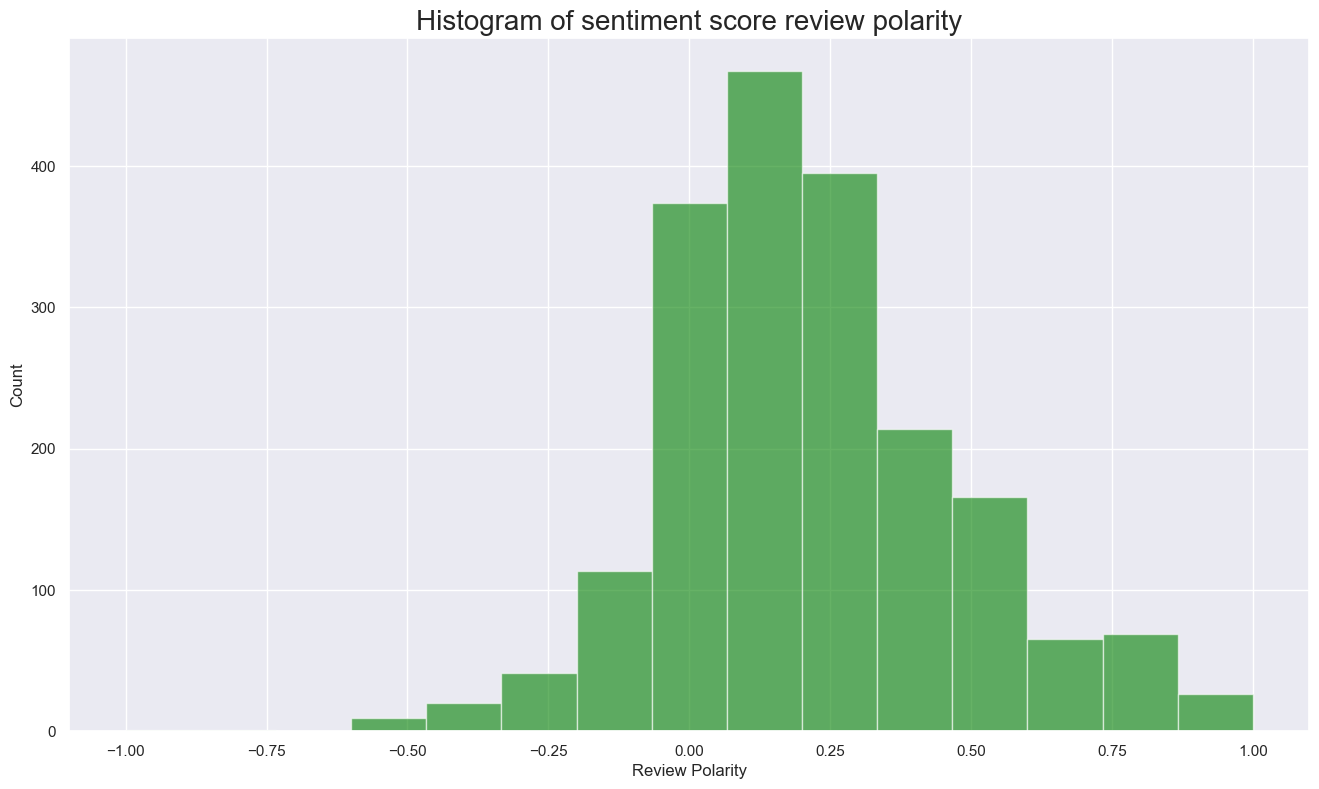

In [70]:
# Create a histogram plot with bins = 15.
# Histogram of polarity.
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3_copy['review_polarity'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('Review Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score review polarity', fontsize=20)

# View the plot.
plt.show()

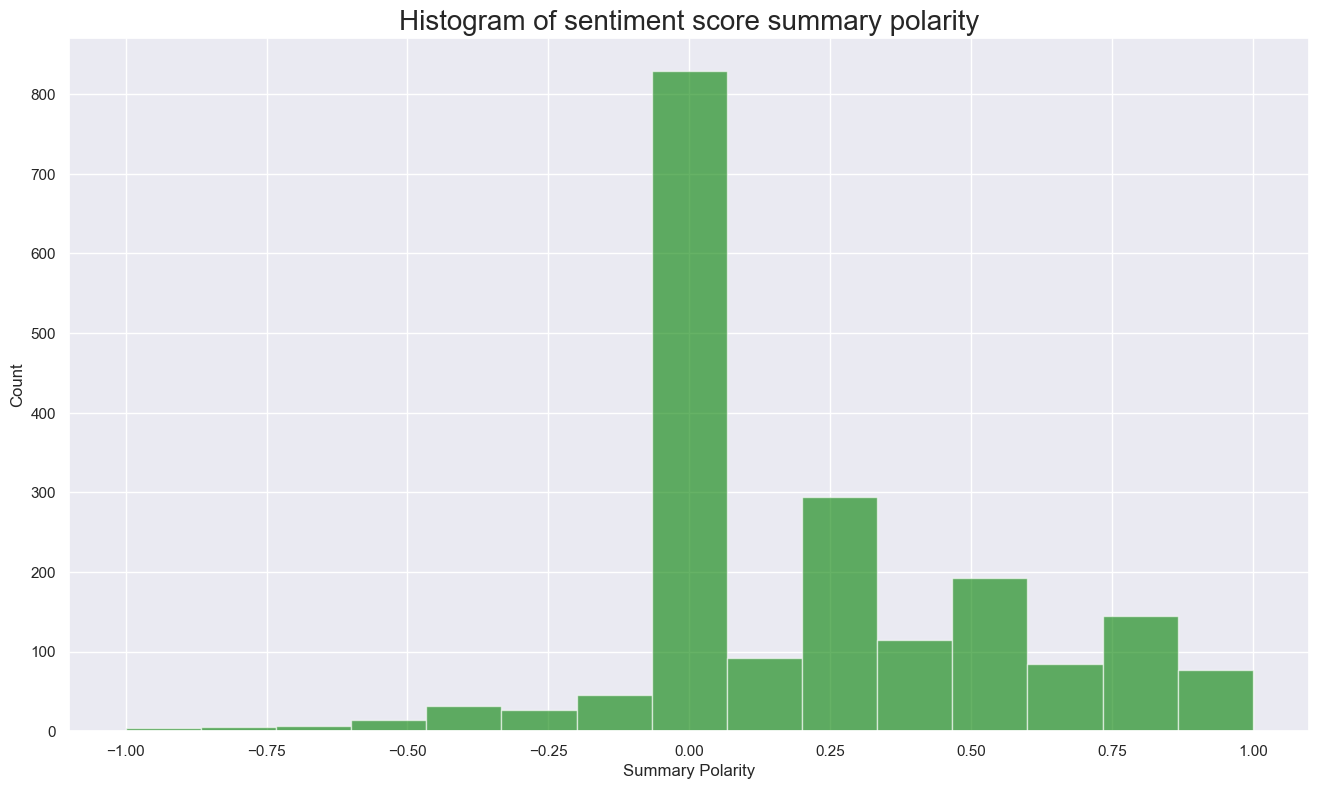

In [71]:
# Create a histogram plot with bins = 15.
# Histogram of polarity.
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3_copy['summary_polarity'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('Summary Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score summary polarity', fontsize=20)

# View the plot.
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [72]:
# Create a DataFrame containing the top 20 positive sentiment reviews based on 'review_polarity'.
positive_sentiment_reviews = df3_copy.nlargest(20, 'review_polarity')

# Select only the necessary columns.
positive_sentiment_reviews = positive_sentiment_reviews[['review', 'review_polarity']]

# Join tokens back into sentences for the 'review' column.
positive_sentiment_reviews['review'] = positive_sentiment_reviews['review'].apply(' '.join)

# Adjust the column width for the 'review' column.
positive_sentiment_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,review_polarity
7,came in perfect condition,1.000000
164,awesome book,1.000000
193,awesome gift,1.000000
489,excellent activity for teaching selfmanagement skills,1.000000
517,perfect just what i ordered,1.000000
583,wonderful product,1.000000
601,delightful product,1.000000
613,wonderful for my grandson to learn the resurrection story,1.000000
782,perfect,1.000000
923,awesome,1.000000


In [73]:
# Top 20 negative reviews.
negative_sentiment_reviews = df3_copy.nsmallest(20, 'review_polarity')

# Select only the necessary columns.
negative_sentiment_reviews = negative_sentiment_reviews[['review', 'review_polarity']]

# Join tokens back into sentences for the 'review' column.
negative_sentiment_reviews ['review'] = negative_sentiment_reviews ['review'].apply(' '.join)

# Adjust the column width for the 'review' column.
negative_sentiment_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,review_polarity
207,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
181,incomplete kit very disappointing,-0.780000
1773,im sorry i just find this product to be boring and to be frank juvenile,-0.583333
362,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000
116,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000
226,this was a gift for my daughter i found it difficult to use,-0.500000
229,i found the directions difficult,-0.500000
289,instructions are complicated to follow,-0.500000
300,difficult,-0.500000
1501,expensive for what you get,-0.500000


In [74]:
# Top 20 positive summaries.
positive_sentiment_summaries = df3_copy.nlargest(20, 'summary_polarity')

# Select only the necessary columns.
positive_sentiment_summaries = positive_sentiment_summaries[['summary', 'summary_polarity']]

# Join tokens back into sentences for the 'summary' column.
positive_sentiment_summaries ['summary'] = positive_sentiment_summaries ['summary'].apply(' '.join)

# Adjust the column width for the 'summary' column.
positive_sentiment_summaries.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,summary_polarity
6,best gm screen ever,1.000000
28,wonderful designs,1.000000
32,perfect,1.000000
80,theyre the perfect size to keep in the car or a diaper,1.000000
133,perfect for preschooler,1.000000
139,awesome sticker activity for the price,1.000000
160,awesome book,1.000000
162,he was very happy with his gift,1.000000
186,awesome,1.000000
209,awesome and welldesigned for 9 year olds,1.000000


In [75]:
# Top 20 negative summaries.
negative_sentiment_summaries = df3_copy.nsmallest(20, 'summary_polarity')

# Select only the necessary columns.
negative_sentiment_summaries = negative_sentiment_summaries[['summary', 'summary_polarity']]

# Join tokens back into sentences for the 'summary' column.
negative_sentiment_summaries ['summary'] = negative_sentiment_summaries ['summary'].apply(' '.join)

# Adjust the column width for the 'summary' column.
negative_sentiment_summaries.style.set_properties(subset=['summary'], **{'width': '1200px'}) 

,summary,summary_polarity
21,the worst value ive ever seen,-1.000000
207,boring unless you are a craft person which i am,-1.000000
819,boring,-1.000000
1148,before this i hated running any rpg campaign dealing with towns because it,-0.900000
1,another worthless dungeon masters screen from galeforce9,-0.800000
143,disappointed,-0.750000
623,disappointed,-0.750000
785,disappointed,-0.750000
1591,disappointed,-0.750000
361,promotes anger instead of teaching calming methods,-0.700000


## 7. Discuss: Insights and observations

##### Positive Reviews:

1. Customers express high satisfaction with various products, such as toys, games, and educational materials.
2. Positive sentiment is consistently reflected in reviews mentioning terms like "perfect," "awesome," "excellent," and "wonderful."
3. Customers appreciate the quality, functionality, and enjoyment provided by the products they purchased.
4. Positive sentiment is also expressed toward the seller or provider of the products, indicating good experiences with the business overall.

##### Negative Reviews:

1. Some customers express dissatisfaction with certain products, mentioning issues such as incompleteness, difficulty in use, and disappointment with the quality or functionality.
2. Negative sentiment is evident in reviews using terms like "boring," "disappointing," "difficult," and "frustrated."
3. Customers mention challenges such as complicated instructions, difficulty in assembly or use, and dissatisfaction with the overall experience of the product.
4. Negative sentiment is also associated with products not meeting expectations or being unsuitable for certain age groups or needs.


Overall, while there is a significant number of positive reviews indicating high satisfaction with the products and overall positive sentiment toward the business, there are also negative reviews highlighting areas for improvement or addressing issues that may impact customer experience and satisfaction. 

Customer sentiment toward the business, as reflected in summary reviews, varies widely. Positive sentiments are evident in reviews praising products as "perfect," "wonderful," and "awesome," indicating high levels of satisfaction. Customers express appreciation for product quality, design, and suitability for various purposes, such as educational activities and therapy tools. However, negative sentiments also emerge, with customers expressing disappointment in product value, quality, and usability. Reviews mention products as "boring," "disappointing," and "bad quality," highlighting areas for improvement. Despite the presence of negative feedback, positive sentiments dominate, emphasising the overall positive customer experience with the business.

Limitation: 

In the context of the sentiment analysis conducted, it's essential to acknowledge a potential limitation inherent in the methodology employed. Specifically, while the analysis aimed to identify negative sentiments, it's recognised that certain positive sentiments may have been inadvertently included in the output due to the nature of the polarity scoring algorithm. This observation underscores the importance of critically assessing the results and considering the broader context of the data. It also highlights the need for continued refinement and validation of sentiment analysis techniques to ensure the accuracy and reliability of insights derived from such analyses. That being said, overall customers express positive sentiments in their online reviews regarding Turtle Games' products.

# 